### **Fire detection system**

In [140]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
#import the necessary libraires
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
random.seed(0)

In [142]:
#load the data
df = pd.read_csv('/content/drive/MyDrive/smoke_detection_iot.csv')

### **Preprocessing phase**

In [143]:
#show the first 5 individuals of our dataset
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [144]:
#check the dataset's shape
df.shape

(62630, 16)

In [145]:
#check the dataset's columns
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

we can already see that the first column is useless, it doesn't give any information(the id), so we sill drop it

In [146]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [147]:
#show some info about our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


we can see that all the data is numeric, so no need to one hot or label encoding
And also, we do not have any missing values to deal with or infere!


**Understanding the columns**

In [148]:
#check our target
df['Fire Alarm'].unique()

array([0, 1])

Timestamp UTC seconds (also known as Unix timestamp) is a way to represent a point in time as the number of seconds that have elapsed since January 1, 1970, 00:00:00 UTC. It is a widely used standard in computing systems and databases, as it provides a simple and consistent way to store and manipulate dates and times. We want our datset to have a simple representation of time, so we'll add a Time column using the UTC values

In [149]:
# we convert the utc values to simple time
time = []
for i in df['UTC']:
    t = datetime.fromtimestamp(i)
    time.append(t)
df['Time'] = time

In [150]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,Time
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,2022-06-09 00:08:51
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0,2022-06-09 00:08:52
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0,2022-06-09 00:08:53
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0,2022-06-09 00:08:54
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0,2022-06-09 00:08:55


In [151]:
#UTC column is now useless, and even CNT after some researches we did, we found out that it doesn't add any information regarding our problem
df.drop(columns=['UTC', 'CNT'], inplace=True)

In [152]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Time
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:51
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:52
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:53
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:54
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:55


**Some visualizations**

In [153]:
X = df.copy() # X contains the data without the target variable
y = X.pop('Fire Alarm')# Y contains the target variable

In [154]:
y.value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

(array([[1.62590945e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.62590945e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.57232687e-04, 1.24351050e-06, 5.21807121e-07, 2.80373976e-07,
         2.28452869e-07, 1.97300205e-07, 2.44029201e-07, 1.24610656e-07,
         7.78816599e-08, 2.44029201e-06],
        [1.60602367e-04, 7.37279713e-07, 8.54102203e-07, 1.79127818e-07,
         1.11630379e-07, 4.93250512e-08, 3.37487193e-08, 7.78816599e-09,
         7.78816599e-09, 7.78816599e-09],
        [0.00000000e+00, 2.77518315e-06, 1.59815762e-04, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 2.53634606e-06, 1.6

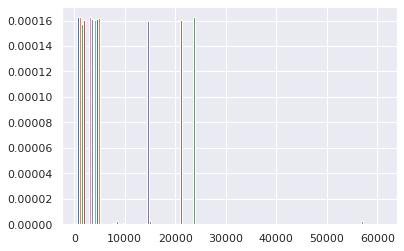

In [155]:
#visualize the data distribution
plt.hist(X, density = True)

This code generates a multi-plot figure that visualizes the trends of each feature over time and how they are related to the "Fire Alarm" column

In [156]:
sns.set_palette("pastel")

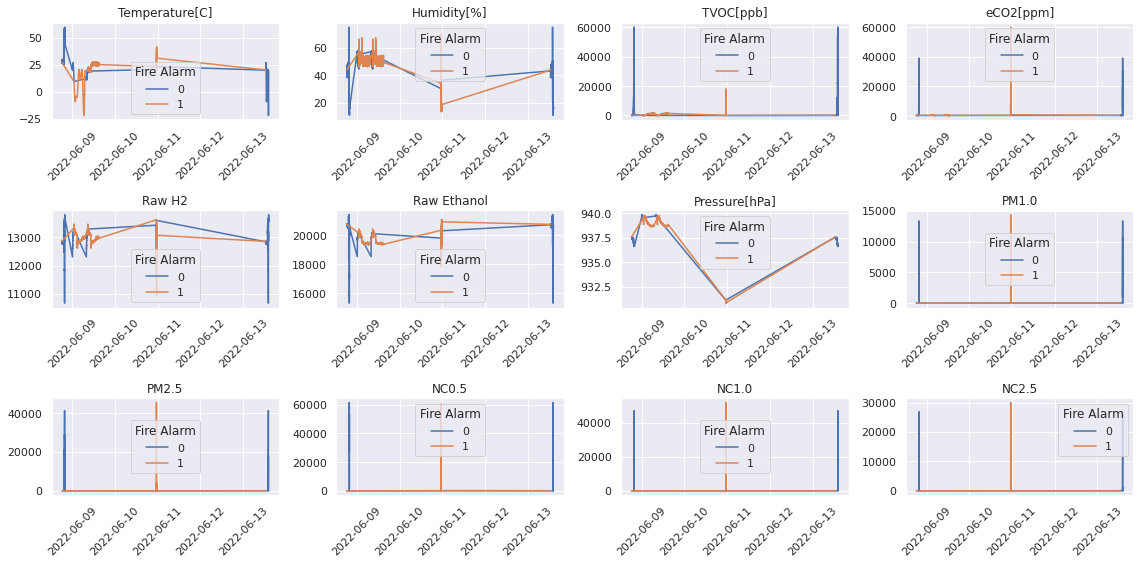

In [157]:
plt.figure(figsize=(16,8))
for i,j in zip(df.columns[:-2], range(len(df.columns)-2)):
    sns.set_theme(style="darkgrid")
    plt.subplot(3,4,j+1)
    plt.xticks(rotation=45)
    plt.title(i)
    sns.lineplot(data = df, x=df['Time'], y=df[i], hue=df['Fire Alarm'])
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Temperature[C]', ylabel='Humidity[%]'>

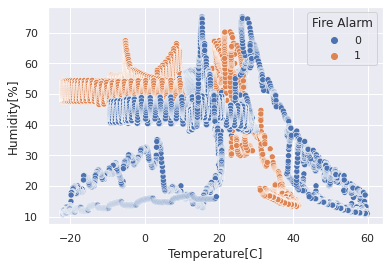

In [158]:
sns.scatterplot(data=df, x='Temperature[C]', y='Humidity[%]', hue='Fire Alarm')

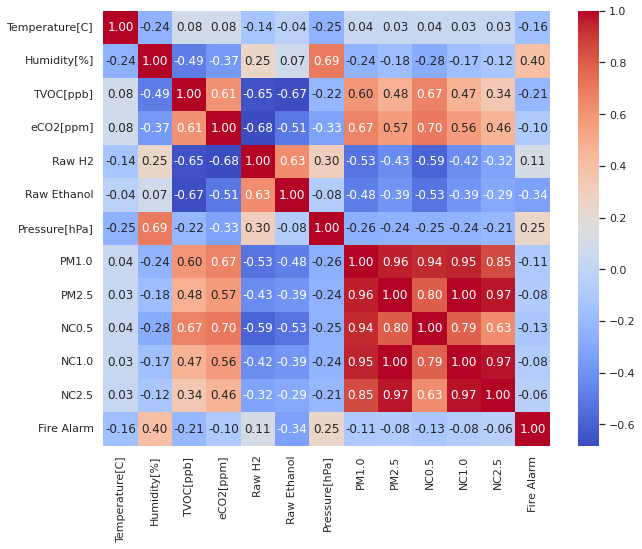

In [159]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True,cmap='coolwarm', fmt='.2f',annot_kws={"size": 12})
plt.show()

It can be seen that time does not affect the other parameters. Both positive and negative results are at different points of time. Time will not be taken into account for future prediction.

In [160]:
df = df.drop(columns=['Time'])

In [161]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [162]:
df.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

no nan values! Yayyy

Text(0.5, 1.0, 'Distribution of Fire Alarm')

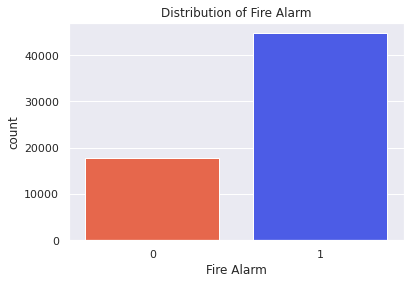

In [163]:
# Define a custom color palette
custom_palette = ["#FF5733", "#3348FF"]
sns.set_theme(style="darkgrid", palette=custom_palette)
sns.countplot(x='Fire Alarm',data=df)
plt.title('Distribution of Fire Alarm')

In [164]:
#take the variables with 10highest correlation scores
corr = df.corr()
triangle = corr.abs().where(np.tril(np.ones(corr.shape), k=-1).astype(bool))
triangle.stack().sort_values(ascending = False)[:10]

NC1.0  PM2.5        0.999787
NC2.5  NC1.0        0.974249
       PM2.5        0.969382
PM2.5  PM1.0        0.956118
NC1.0  PM1.0        0.949860
NC0.5  PM1.0        0.940045
NC2.5  PM1.0        0.854901
NC0.5  PM2.5        0.798873
NC1.0  NC0.5        0.786274
NC0.5  eCO2[ppm]    0.699604
dtype: float64

deprivation indicators with the highest correlation 0.999 which is almost a perfect correlation, so we drop one of them

In [165]:
df = df.drop(columns=['PM2.5','NC1.0'])

In [166]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,491.463608,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,4265.661251,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,8.820000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,12.450000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,14.420000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,61482.030000,30026.438000,1.000000


### **Modeling phase**

In [167]:
y = df['Fire Alarm']
X = df.drop(columns=['Fire Alarm'])

In [168]:
#train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [169]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (50104, 10) (50104,)
Testing set shape: (12526, 10) (12526,)


In [170]:
#scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Choosing models

SVM Classifier

In [174]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
# Create an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf')

# Train the classifier on the training data
svm.fit(X_train_scaled, y_train)

# Predict the labels of the test data
y_pred = svm.predict(X_test_scaled)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("accuracy", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


KeyboardInterrupt: ignored

Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)

# Train the classifier on the training data
lr.fit(X_train_scaled, y_train)

# Use the classifier to make predictions on the testing data
y_pred = lr.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.8911863324285486
Precision: 0.9015062493323363


Deep neural network

In [181]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Create a sequential model
model = Sequential()

# Add a dense layer with 64 neurons and relu activation (input layer)
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
#add a dropout layer 
model.add(Dropout(0.5))
# Add a dense layer with 32 neurons and relu activation (hidden layer)
model.add(Dense(32, activation='tanh'))
# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.2))
# Add a dense layer with 1 neuron and sigmoid activation(output layer)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with bce loss and Adam optimizer
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Train the model on the training data for 5 epochs
history=model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))

# Predict the labels of the test data
y_pred = model.predict(X_test_scaled)

y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('accuracy',accuracy)

Epoch 1/5
1566/1566 [==============================] - 6s 3ms/step - loss: 0.1172 - accuracy: 0.9462 - precision: 0.9501 - recall: 0.9762 - val_loss: 0.0846 - val_accuracy: 0.9553 - val_precision: 0.9409 - val_recall: 0.9998
Epoch 2/5
1566/1566 [==============================] - 9s 6ms/step - loss: 0.0859 - accuracy: 0.9641 - precision: 0.9641 - recall: 0.9866 - val_loss: 0.0506 - val_accuracy: 0.9812 - val_precision: 0.9854 - val_recall: 0.9882
Epoch 3/5
1566/1566 [==============================] - 11s 7ms/step - loss: 0.0677 - accuracy: 0.9744 - precision: 0.9740 - recall: 0.9907 - val_loss: 0.0321 - val_accuracy: 0.9920 - val_precision: 0.9940 - val_recall: 0.9947
Epoch 4/5
1566/1566 [==============================] - 4s 3ms/step - loss: 0.0588 - accuracy: 0.9797 - precision: 0.9788 - recall: 0.9932 - val_loss: 0.0332 - val_accuracy: 0.9905 - val_precision: 0.9879 - val_recall: 0.9989
Epoch 5/5
392/392 [==============================] - 1s 1ms/step
accuracy 0.9903400926073767


plot the metrics from the DNN

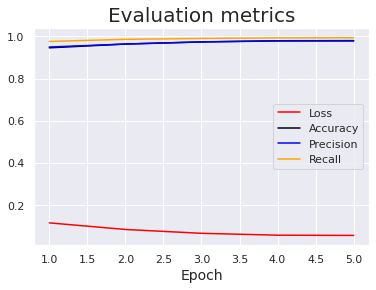

In [184]:
plt.plot(
    np.arange(1, 6), 
    history.history['loss'], label='Loss',color='red'
)
plt.plot(
    np.arange(1, 6), 
    history.history['accuracy'], label='Accuracy',color='black'
)
plt.plot(
    np.arange(1, 6), 
    history.history['precision'], label='Precision',color='blue'
)
plt.plot(
    np.arange(1, 6), 
    history.history['recall'], label='Recall',color='orange'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

The true ositives, true negatives ratios via the conf matrix


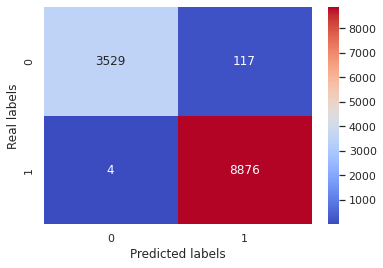

In [190]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap='coolwarm', fmt='g')
plt.ylabel('Real labels')
plt.xlabel('Predicted labels')
plt.show()

Thank you! Notebook by ARTEMIS